In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30 
my_second = 15

In [4]:
my_date = datetime(my_year, my_month, my_day)

In [5]:
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [7]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [8]:
type(my_date_time)

datetime.datetime

In [9]:
my_date_time. day

2

In [11]:
my_date_time.month

1

In [12]:
first_two = [datetime(2016,1,1), datetime(2016, 1, 2)]

In [13]:
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [14]:
dt_ind = pd.DatetimeIndex(first_two)

In [16]:
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [17]:
data = np.random.randn(2,2)
data

array([[ 0.34921887, -1.45264268],
       [ 0.17120166,  0.98395304]])

In [18]:
cols = ['a','b']

In [19]:
df = pd.DataFrame(data, dt_ind, cols)

In [20]:
df

,a,b
2016-01-01,0.349219,-1.452643
2016-01-02,0.171202,0.983953


In [21]:
# latest date information
df.index.argmax()

1

In [22]:
# latest date information
df.index.max()

Timestamp('2016-01-02 00:00:00')

In [23]:
#earliest date location
df.index.argmin()

0

In [24]:
#earliest date information
df.index.min()

Timestamp('2016-01-01 00:00:00')

# Time Resampling

Pandas has their own way of showing frequency

In [25]:
ls

practice_time_series.ipynb  walmart_stock.csv


In [27]:
df = pd.read_csv('walmart_stock.csv')

In [28]:
df.info()
#shows that date is a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [30]:
df['Date'] =  pd.to_datetime(df['Date'])

In [31]:
# format string for to datetime
# pandas documentation for to_datetime

In [34]:
df.set_index('Date', inplace = True)

In [ ]:
# way to have the dates checked out on their own
# pd.read_csv('', index_col = 'Date', parse_dates = True)


In [37]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [38]:
#A means resample at end of year
df.resample(rule = 'A')

In [39]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [41]:
df.resample(rule = 'BQ').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [42]:
df.resample(rule = 'A').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [43]:
def first_day(entry):
    return entry[0]

In [45]:
#returns the first sample on each frequency
df.resample('A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


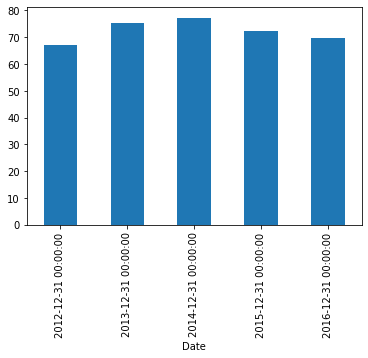

In [46]:
df['Close'].resample('A').mean().plot(kind = 'bar')

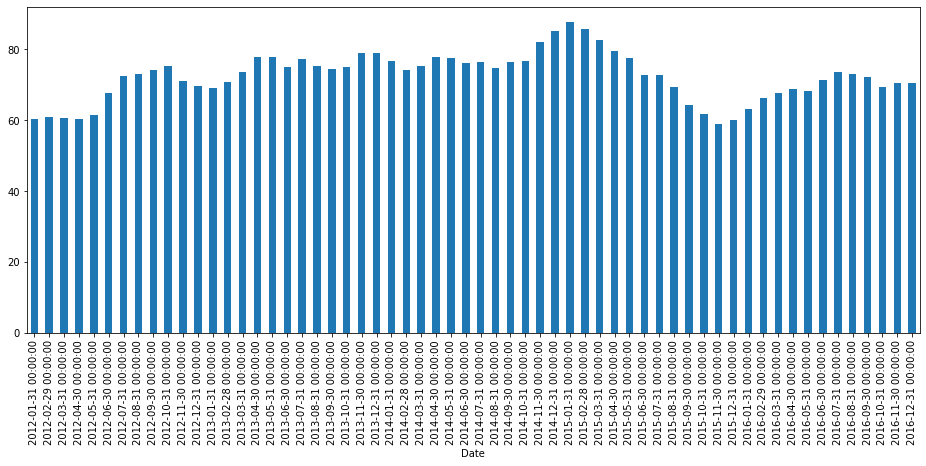

In [48]:
df['Close'].resample('M').mean().plot(kind = 'bar', figsize = (16,6))

In [49]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [50]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [52]:
# shift one period up
# we lose the data at the end
df.shift(periods =1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [53]:
df.shift(periods = -1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109


In [54]:
#shifting backwards gets rid of first datapoints
df.shift(periods = -1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# we don't change anything, it just shows every data to the end of the month
# similar to aggregation
df.tshift(freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [ ]:
df.tshift(freq='A')

# Built In Rolling Method

In [58]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


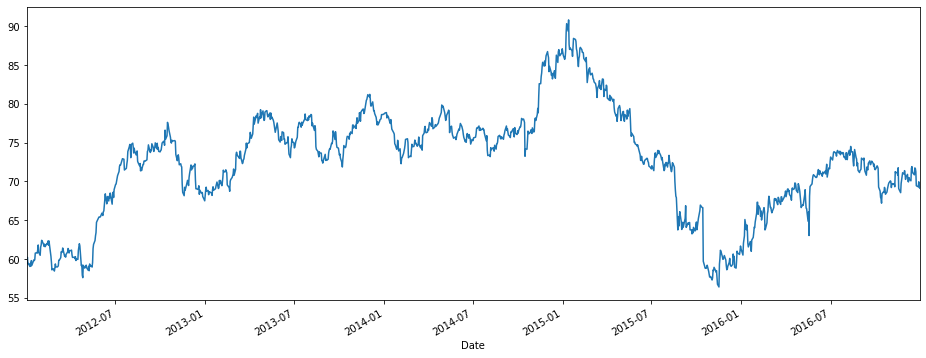

In [59]:
df['Open'].plot(figsize=(16,6))

In [61]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


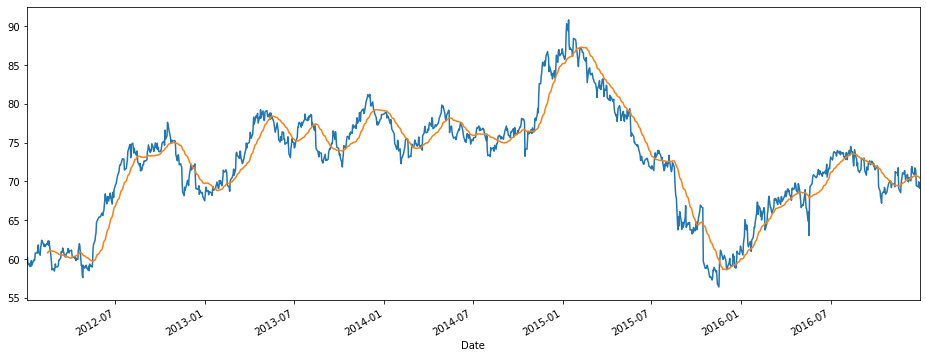

In [63]:
df['Open'].plot()
df.rolling(window = 30).mean()['Close'].plot(figsize=(16,6))


In [65]:
df['Close 30 day MA'] = df['Close'].rolling(window = 30).mean()
 

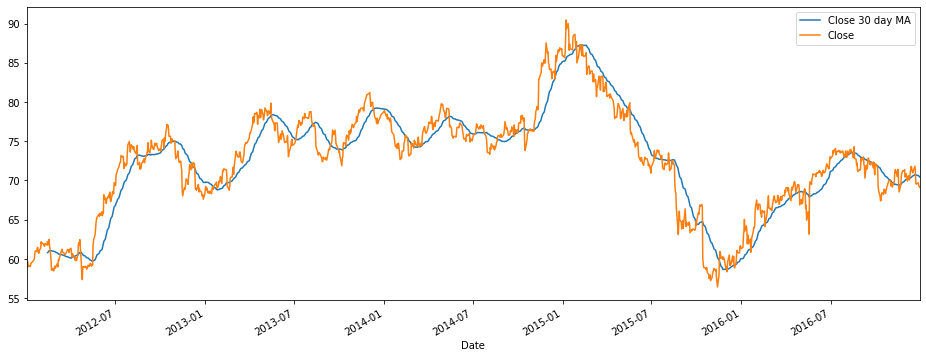

In [70]:
df[['Close 30 day MA', 'Close']].plot(figsize=(16,6))

In [64]:
df['Close'].rolling(window=30).mean()

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
                ...    
2016-12-23    70.677000
2016-12-27    70.626000
2016-12-28    70.586667
2016-12-29    70.514667
2016-12-30    70.439000
Name: Close, Length: 1258, dtype: float64

# Expanding Method

In [ ]:
#takes the average for the whole series. Cumulative average- not useful

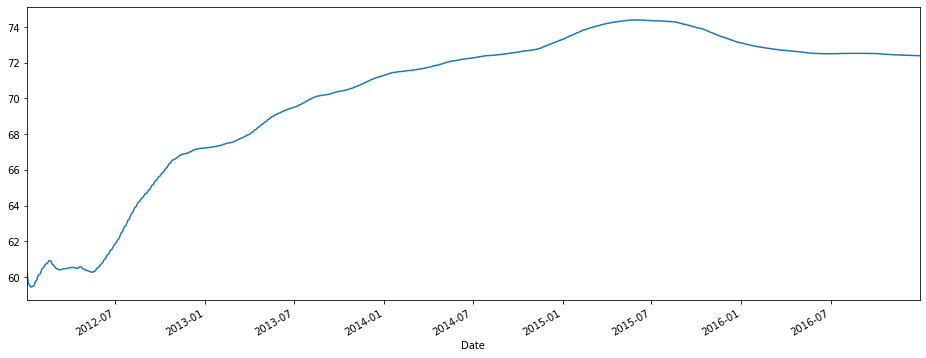

In [71]:
df['Close'].expanding(min_periods = 1).mean().plot(figsize=(16,6))

# Bollinger

In [ ]:
# look at whether the price movements are significant


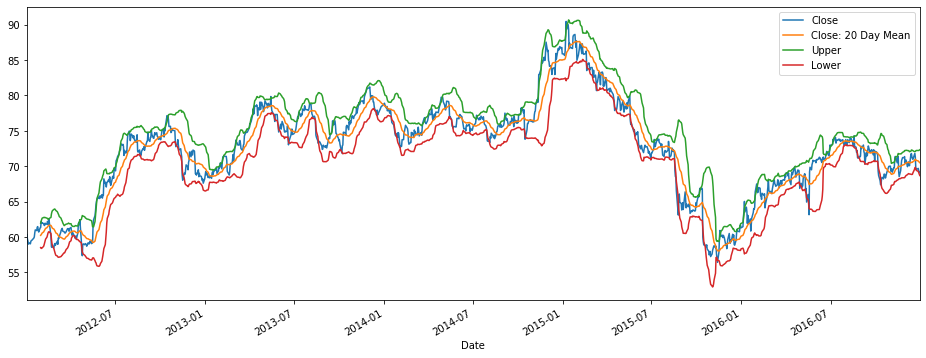

In [73]:
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()


# Upper = 20ma + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())


# Lower
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

# Close
df[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].plot(figsize=(16,6))

# Capstone

In [75]:
import datetime

In [76]:
ls

Ford_Stock.csv              practice_time_series.ipynb
GM_Stock.csv                walmart_stock.csv
Tesla_Stock.csv


In [78]:
tesla = pd.read_csv('Tesla_Stock.csv')

In [79]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [ ]:
# turn date column into datetime

In [84]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [86]:
tesla.set_index('Date', inplace=True)